## Problem Statement

A hospital readmission is when a patient who is discharged from the hospital, gets re-admitted again within a certain period of time. Hospital readmission rates for certain conditions are now considered an indicator of hospital quality, and also affect the cost of care adversely. For this reason, Centers for Medicare & Medicaid Services established the Hospital Readmissions Reduction Program which aims to improve quality of care for patients and reduce health care spending by applying payment penalties to hospitals that have more than expected readmission rates for certain conditions. Although diabetes is not yet included in the penalty measures, the program is regularly adding new disease conditions to the list, now totaling 6 for FY2018. In 2011, American hospitals spent over 41 billion dollars on diabetic patients who got readmitted within 30 days of discharge. Being able to determine factors that lead to higher readmission in such patients, and correspondingly being able to predict which patients will get readmitted can help hospitals save millions of dollars while improving quality of care. 

## Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading CSV file

In [2]:
df = pd.read_csv("/kaggle/input/diabetes/diabetic_data.csv")

## Data preview

In [3]:
# Printing the first 10 columns
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


You can see that some values ​​are represented with '?' (null), so we'll need to handle those missing values. But it will still be necessary to check in more detail which values ​​each variable can assume in order not to miss any information.

## Getting unique values per column

In [4]:
for col in df:
    print(f"{col} = {df[col].unique()}")

encounter_id = [  2278392    149190     64410 ... 443854148 443857166 443867222]
patient_nbr = [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
race = ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender = ['Female' 'Male' 'Unknown/Invalid']
age = ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight = ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id = [6 1 2 3 4 5 8 7]
discharge_disposition_id = [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id = [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital = [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code = ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty = ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surg



We then notice that the "gender" variable will need to be treated as it also has invalid values.
```
gender = ['Female' 'Male' 'Unknown/Invalid']
```
So we will check it individually.

In addition, there are some medications that do not provide us with much information because they all have the same value.

```
examide = ['No']
citoglipton = ['No']
```



## Checking for null values

In [5]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

# For genders:
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 3


Note that there are variables with many null values (weight, payer_code and medical_specialty). In this case, we will delete these columns. In the other cases, we will treat them so that they can still be used.

## Deleting null values

In [6]:
# Removing columns with many null values
df = df.drop(['weight','payer_code','medical_specialty'], axis = 'columns')

# Removing medication that don't give us information
df.drop(['examide','citoglipton'], axis='columns', inplace=True)

Then we will create an *index* with all the **rows** that have some value (said earlier) that will need to be deleted.

In [7]:
# Creating a boolean "mask" for each variable
mask_race = df['race'] == '?'
mask_diag1 = df['diag_1'] == '?'
mask_diag2 = df['diag_2'] == '?'
mask_diag3 = df['diag_3'] == '?'
mask_gender = df['gender'] == 'Unknown/Invalid'

# Combining the masks using "or" and getting the indices of the rows that contain at least 1 null
combined_mask = np.logical_or.reduce([mask_race, mask_diag1, mask_diag2, mask_diag3, mask_gender])
drop_indices = df[combined_mask].index

# Removing rows from DataFrame
df.drop(drop_indices, inplace=True)

## Checking for duplicates

In [8]:
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted]
Index: []

[0 rows x 45 columns]


Since it doesn't print anything, there are no duplicate variables in our DataFrame. However, there will probably be duplicate patient numbers (in the "patient_nbr" variable), so let's deal with that next.



## Performing some operations for analysis

In [9]:
# Creating a variable that is the sum of others
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

These are values of how many hospital services a person used last year. We added these three services together to create a new variable "service_utilization" to simplify when trying to figure out some relationship.

Changing medication for diabetics on admission has been shown by previous research to be associated with lower readmission rates. So let's count how many changes were made in total for each patient and put this variable as a new resource.

In [10]:
# Medications
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
        'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin',
        'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin',
        'troglitazone', 'tolbutamide', 'acetohexamide']

# Counting changes
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]
df['numchange'].value_counts()


0    71309
1    25350
2     1281
3      107
4        5
Name: numchange, dtype: int64

## Recoding variables

In [11]:
# Using replace() to replace values
df['A1Cresult'] = df['A1Cresult'].replace({'>7': 1, '>8': 1, 'Norm': 0, 'None': -99})
df['max_glu_serum'] = df['max_glu_serum'].replace({'>200': 1, '>300': 1, 'Norm': 0, 'None': -99})
df['admission_type_id'] = df['admission_type_id'].replace({2: 1, 7: 1, 6: 5, 8: 5})
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace({6: 1, 8: 1, 9: 1, 13: 1,
                                                                         3: 2, 4: 2, 5: 2, 14: 2, 22: 2, 23: 2, 24: 2,
                                                                         12: 10, 15: 10, 16: 10, 17: 10,
                                                                         25: 18, 26: 18})
df['admission_source_id'] = df['admission_source_id'].replace({2: 1, 3: 1,
                                                               5: 4, 6: 4, 10: 4, 22: 4, 25: 4,
                                                               15: 9, 17: 9, 20: 9, 21: 9,
                                                               13: 11, 14: 11})

Our dataset uses string values for "gender", "race", "medication chance" and all medications. To improve our analysis we will adjust these variables to numeric.

In [12]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

Furthermore, we are only given age as 10-year-by-10-year categories, so we don't know the exact age of each patient. We want to be able to see the effect of increasing age on readmission (even if not as specific), and to do this we will assume that the mean patient age is at the midpoint of the age category.

In [13]:
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

8     25305
7     21809
9     16702
6     16697
5      9265
4      3548
10     2717
3      1478
2       466
1        65
Name: age, dtype: int64

As previously mentioned, several patients had several readmissions. So let's delete the other readmissions and leave only the first one.

In [14]:
df.drop_duplicates(subset ="patient_nbr", keep = "first", inplace = True)
df.drop(['encounter_id','patient_nbr'], axis='columns', inplace=True)

The outcome we are looking for is whether the patient is readmitted to the hospital within 30 days or not. To reduce our problem to a binary classification, we combined readmission after 30 days and non-readmission into a single category.

In [15]:
df['readmitted'] = df['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0})
df['readmitted'] = df['readmitted'].map({0: 0, 1: 1}).fillna(0)

## Data Visualization

Let's import one more library, **seaborn**. It is a data visualization library built on top of the matplotlib library.

In [16]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Readmission distribution

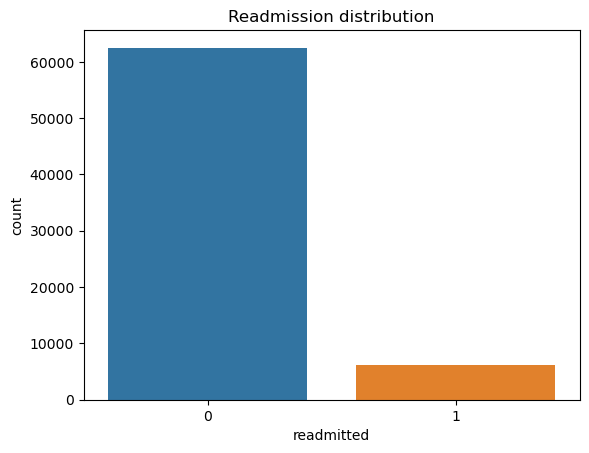

In [17]:
sns.countplot(x = "readmitted", data = df)
plt.title("Readmission distribution")
plt.show()

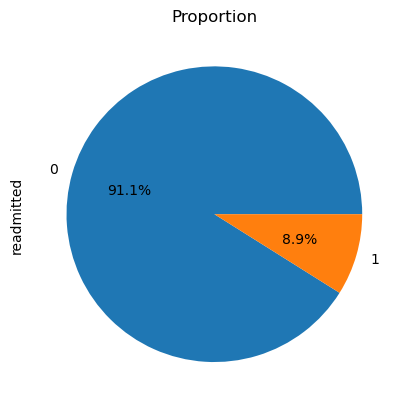

In [18]:
df.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion")
plt.show()

#### Time in hospital X Readmitted

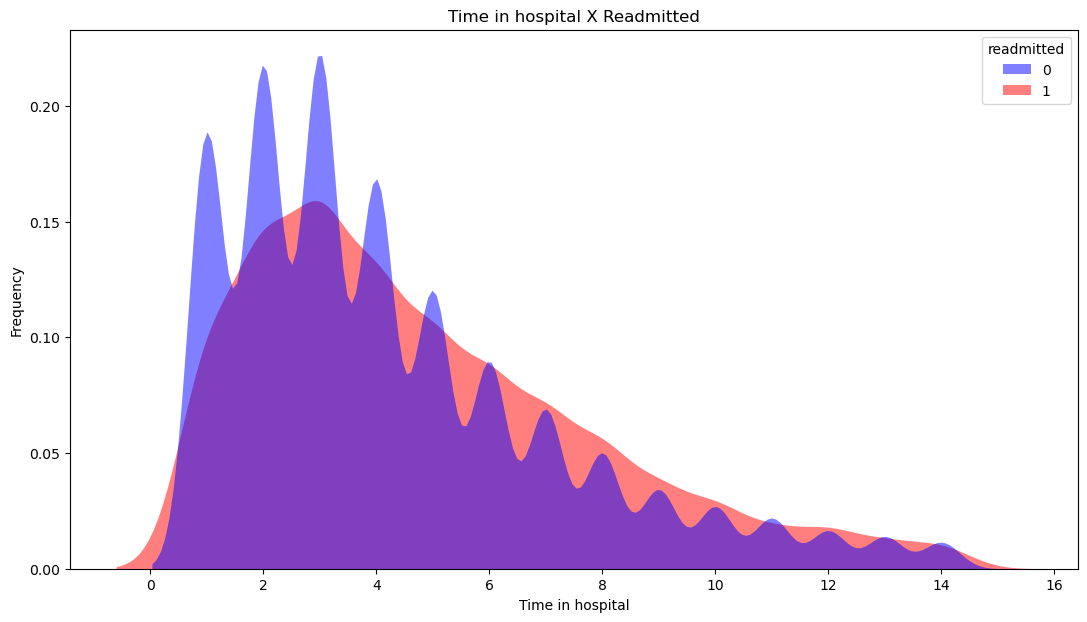

In [19]:
fig, ax = plt.subplots(figsize=(13, 7))

sns.kdeplot(data=df, x='time_in_hospital', hue='readmitted', fill=True, common_norm=False, palette=['b', 'r'],
            alpha=.5, linewidth=0)

ax.set(xlabel='Time in hospital', ylabel='Frequency')
plt.title('Time in hospital X Readmitted')

plt.show()

#### Age X Readmitted

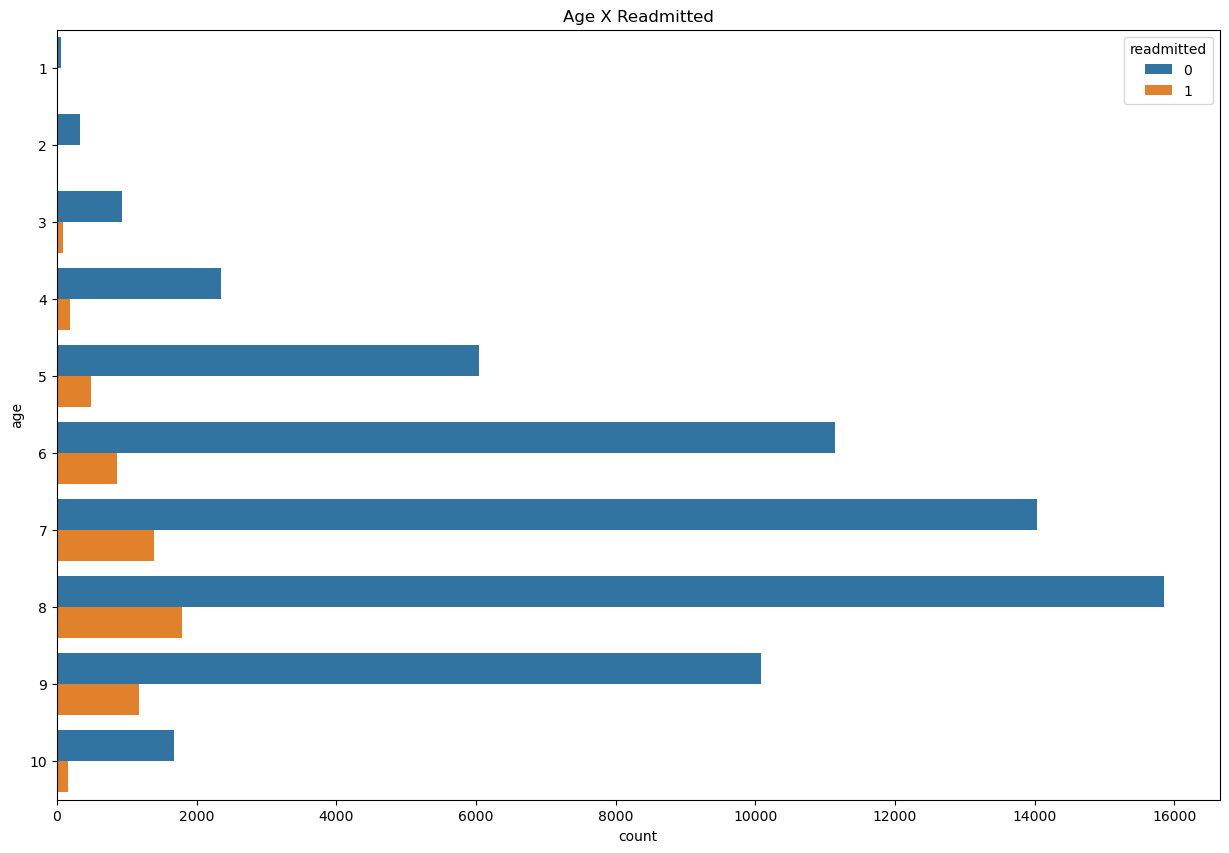

In [20]:
plt.figure(figsize=(15, 10))
sns.countplot(y=df['age'], hue=df['readmitted'])
plt.title('Age X Readmitted')
plt.show()

#### Race X Readimitted

<Axes: xlabel='count', ylabel='race'>

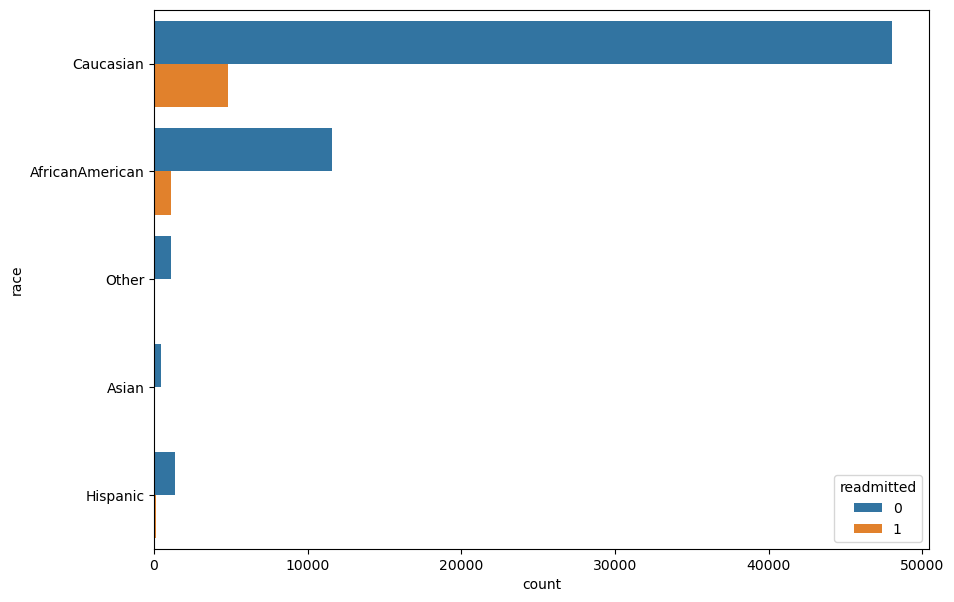

In [21]:
fig = plt.figure(figsize=(10,7))
sns.countplot(y = df['race'], hue = df['readmitted'])

#### Medications number X Readmitted

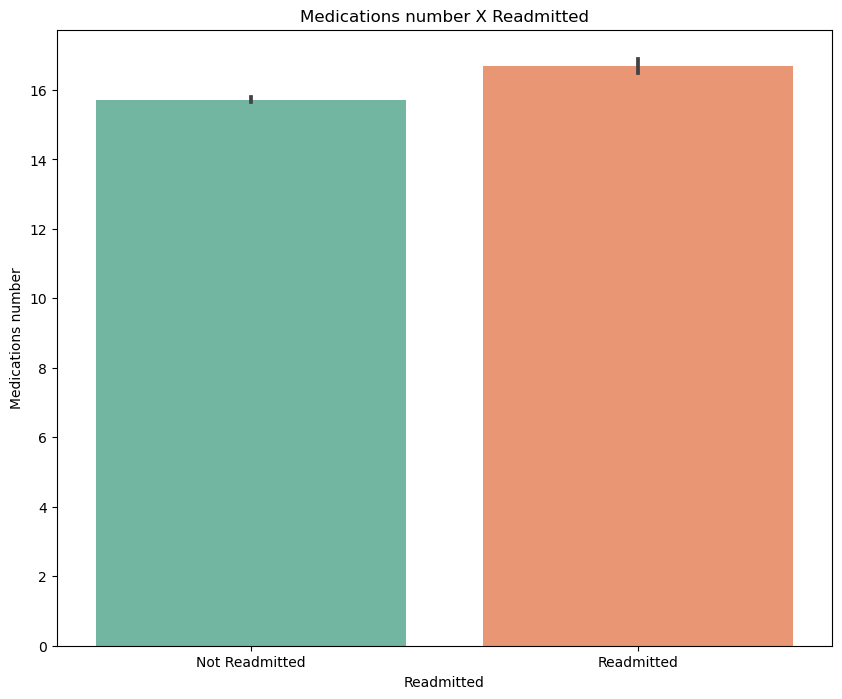

In [22]:
plt.figure(figsize=(10, 8))
sns.barplot(x=df['readmitted'], y=df['num_medications'], palette='Set2')
plt.title("Medications number X Readmitted")
plt.xlabel("Readmitted")
plt.ylabel("Medications number")
plt.xticks(ticks=[0, 1], labels=['Not Readmitted', 'Readmitted'])

plt.show()

#### Gender X Readmitted

In [23]:
df['gender'] = df['gender'].replace({'0': 'Female', '1': 'Male'})
df['gender'] = df['gender'].astype('category')

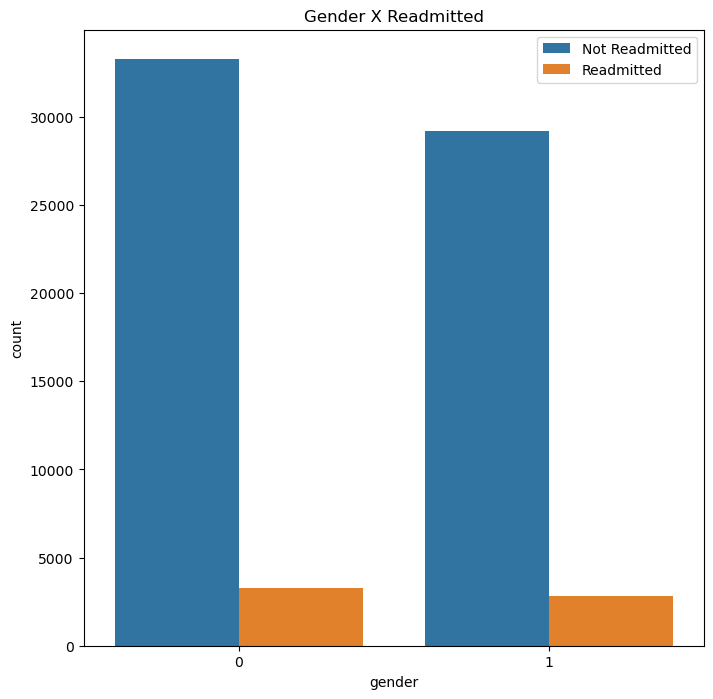

In [24]:
plt.figure(figsize=(8, 8))
sns.countplot(x=df['gender'], hue=df['readmitted'])
plt.title("Gender X Readmitted")
plt.legend(['Not Readmitted', 'Readmitted'])

plt.show()

#### Medication Change X Readmitted

In [25]:
df['change'] = df['change'].replace({0: 0, 1: 1})

Text(0.5, 1.0, 'Medication Change X Readmitted')

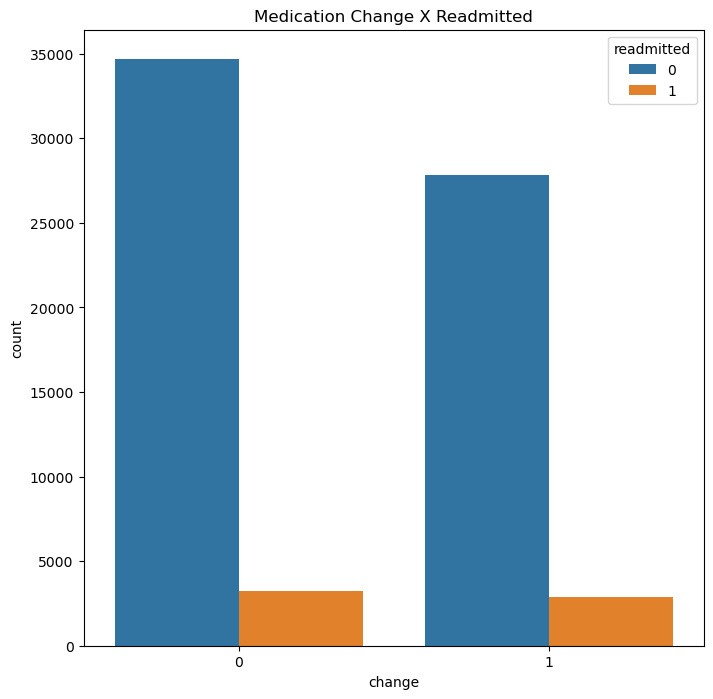

In [26]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x=df['change'], hue=df['readmitted'])
plt.title('Medication Change X Readmitted')

#### Glucose serum test result X Readmission

Text(0.5, 1.0, 'Glucose test serum test result VS. Readmission')

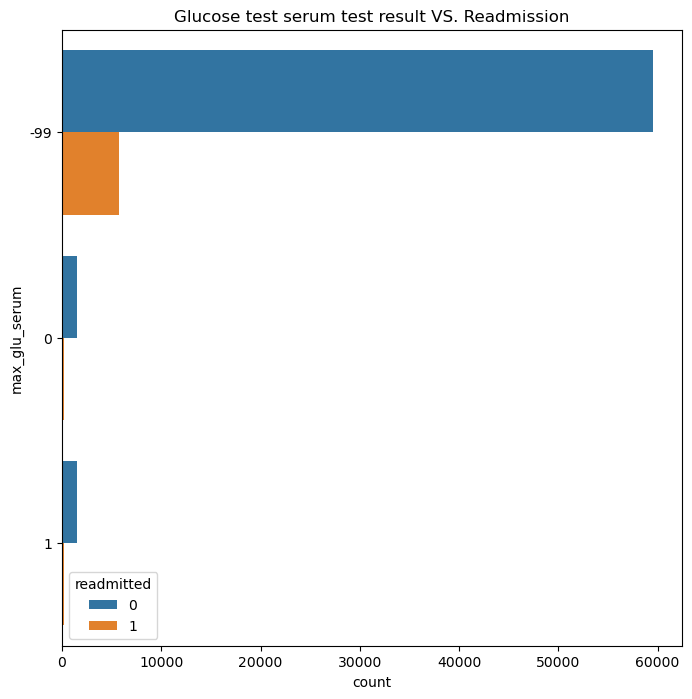

In [27]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['max_glu_serum'], hue = df['readmitted']).set_title('Glucose test serum test result VS. Readmission')

#### A1C result X Readmission

Text(0.5, 1.0, 'A1C test result VS. Readmission')

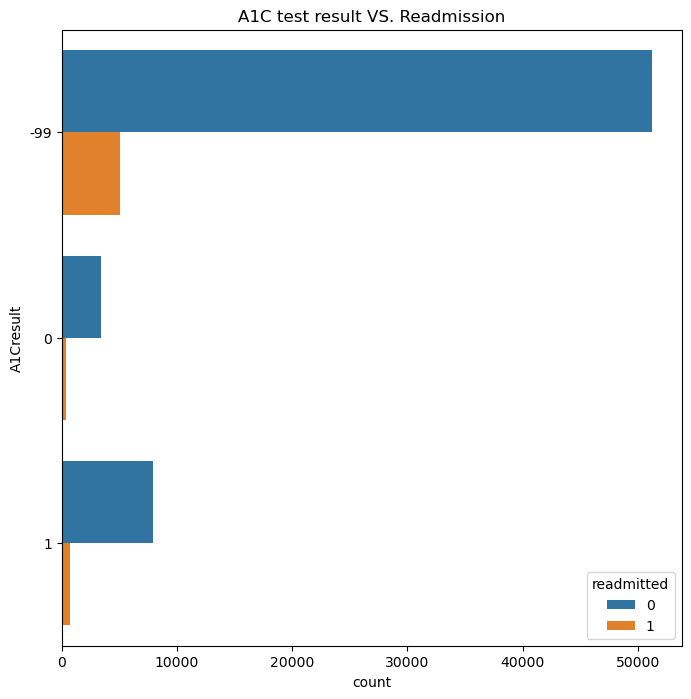

In [28]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y= df['A1Cresult'], hue = df['readmitted']).set_title('A1C test result VS. Readmission')